In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import random
import time
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
LENGTH=100
random.seed(5)
state_M=np.zeros(4,dtype=int)
state_J=0
MS_J1=np.array([1,2,4])
T_J1=np.array([8,16,12])
check_J1=np.zeros(3,dtype=int)
gantt_chart = pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)

In [ ]:
for t in np.arange(1,LENGTH+1):
    if np.any(state_M==0) :
        if state_J == 0:
            for i in np.arange(3):
                if state_J==0:        
                    if check_J1[i]==0:
                        if i==0 or (i>0  and check_J1[i-1]==1) :
                            m=MS_J1[i]-1
                            if state_M[m]==0:
                                gantt_chart.iloc[t-1:t-1+T_J1[i],m]=1
                                state_M[m] += T_J1[i]                       
                                state_J += T_J1[i]
                                check_J1[i] = 1                           
    state_J -= 1
    state_M[state_M !=0] -= 1 
    if np.all(check_J1==1):
        break
    
print(gantt_chart)
print(state_J)
print(state_M)
print(check_J1)
print(t)
                    
raw_data=gantt_chart
np.savetxt(fname='d:/pysrc/data/gantt_chart_simple.csv',X=raw_data,fmt='%0d',delimiter=',')

In [ ]:
import itertools
import math

list_arrange_J1 = list(itertools.permutations(np.arange(0,5)))
print(list_arrange_J1)
for a in list_arrange_J1:
    for j in a :
        print(j)
    print('')






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
mean1, std_dev1 = 0, 1   # 第一峰值的均值和标准差
mean2, std_dev2 = 5, 1.5 # 第二峰值的均值和标准差
size = 1000  # 样本总数
weight1, weight2 = 0.5, 0.5  # 两个分布的权重（权重和需为1）

# 生成随机数
data1 = np.random.normal(mean1, std_dev1, int(size * weight1))
data2 = np.random.normal(mean2, std_dev2, int(size * weight2))

# 合并数据
data = np.concatenate([data1, data2])

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')

# 标题和标签
plt.title("Bimodal Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建示例 DataFrame
index = ['m1', 'm2', 'm3', 'm4']
columns = [str(i) for i in range(1, 101)]
data = np.random.choice([0, 1], size=(4, 100), p=[0.7, 0.3])  # 随机生成0或1
df = pd.DataFrame(data, index=index, columns=columns)

# 绘制图像
plt.figure(figsize=(12, 6))
plt.imshow(df, cmap='Greys', aspect='auto', interpolation='nearest')

# 设置轴标签
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, fontsize=8, rotation=90)
plt.yticks(ticks=np.arange(len(df.index)), labels=df.index, fontsize=10)
plt.xlabel('Columns (1 to 100)', fontsize=12)
plt.ylabel('Index (m1 to m4)', fontsize=12)

# 添加网格线（可选）
plt.grid(False)

# 显示图像
plt.colorbar(label='0 or 1', orientation='vertical')  # 可选：添加颜色说明
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
# 10行5列のランダムな数値データを作成
data = np.random.rand(10, 5)
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
print("元のDataFrame:")
print(df)
# インデックスを削除したNumpy配列を作成
array_without_index = df.to_numpy()
print("\nNumpy配列:")
print(array_without_index)

In [ ]:
import numpy as np

# 创建一个示例二维数组
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# 提取列数
num_columns = array.shape[1]

print(num_columns)  # 输出: 列数: 3


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# 订单数据
processing_times = np.array([
    [15, 10, 10, 15, 11, 14, -1, -1],
    [14, 14, 14, 10, -1, -1, -1, -1],
    [9, 16, 9, 9, 15, -1, -1, -1],
    [9, 10, 13, 10, -1, -1, -1, -1],
    [16, 8, 10, 10, 9, 8, 9, 9],
    [14, 10, 10, 8, 8, -1, -1, -1],
    [9, 9, 9, 16, 10, 8, -1, -1],
    [16, 16, 14, 8, -1, -1, -1, -1]
])

machine_matrix = np.array([
    [1, 3, 1, 4, 3, 2, -1, -1],
    [1, 2, 3, 2, -1, -1, -1, -1],
    [1, 4, 2, 1, 4, -1, -1, -1],
    [3, 2, 4, 2, -1, -1, -1, -1],
    [2, 1, 2, 3, 2, 1, 3, 1],
    [4, 1, 2, 3, 1, -1, -1, -1],
    [1, 2, 4, 1, 4, 3, -1, -1],
    [2, 3, 2, 4, -1, -1, -1, -1]
])

num_jobs = processing_times.shape[0]
num_machines = 4
num_tasks = np.count_nonzero(processing_times != -1)

# **智能初始化**
def create_initial_solution():
    job_order = []
    for j in range(num_jobs):
        for t in range(len(processing_times[j])):
            if processing_times[j][t] != -1:
                job_order.append((j, t))
    return job_order

# **适应度计算**
def evaluate(individual):
    job_completion = {j: 0 for j in range(num_jobs)}
    machine_completion = {m: 0 for m in range(1, num_machines + 1)}
    process_start_time = {}

    for job, task in individual:
        process_time = processing_times[job][task]
        machine = machine_matrix[job][task]

        start_time = max(job_completion[job], machine_completion[machine])
        end_time = start_time + process_time
        process_start_time[(job, task)] = start_time

        job_completion[job] = end_time
        machine_completion[machine] = end_time

    return (max(machine_completion.values()),), process_start_time

# **遗传算法**
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_initial_solution)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ga():
    pop = toolbox.population(n=200)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.1, ngen=200, stats=stats, halloffame=hof, verbose=True)
    best_schedule = hof[0]

    return best_schedule, log

best_schedule, log = run_ga()

# **处理日志数据 (折线图数据)**
gen = log[1]  # 取日志数据
iterations = list(range(len(gen.select("min"))))
best_makespan = gen.select("min")

# **绘制甘特图**
def plot_gantt(best_schedule):
    _, start_times = evaluate(best_schedule)

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.cm.get_cmap("tab10", num_jobs)  # 生成不同 Job 颜色

    for (job, task), start_time in start_times.items():
        machine = machine_matrix[job][task]
        duration = processing_times[job][task]
        ax.barh(y=machine, width=duration, left=start_time, color=colors(job), edgecolor="black", label=f"J{job+1}-P{task+1}")

    ax.set_xlabel("时间 (min)")
    ax.set_ylabel("机器编号")
    ax.set_yticks(range(1, num_machines + 1))
    ax.set_yticklabels([f"M{i}" for i in range(1, num_machines + 1)])
    ax.set_title("生产调度甘特图")
    plt.show()

# **绘制进化折线图**
def plot_evolution_chart(iterations, best_makespan):
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, best_makespan, marker='o', linestyle='-', color='b', label="最优 Makespan")
    plt.xlabel("迭代次数")
    plt.ylabel("最优完成时间 (makespan)")
    plt.title("GA 进化过程中 makespan 变化")
    plt.legend()
    plt.grid()
    plt.show()

# **调用绘图函数**
plot_gantt(best_schedule)
plot_evolution_chart(iterations, best_makespan)


Gen 1: Best=323.0
Gen 2: Best=294.0
交叉操作补全2个基因
Gen 3: Best=293.0
Gen 4: Best=246.0
交叉操作补全1个基因
交叉操作补全1个基因
Gen 5: Best=246.0
Gen 6: Best=239.0
交叉操作补全1个基因
Gen 7: Best=239.0
Gen 8: Best=239.0
Gen 9: Best=239.0
Gen 10: Best=229.0
Gen 11: Best=229.0
Gen 12: Best=221.0
Gen 13: Best=221.0
Gen 14: Best=214.0
Gen 15: Best=214.0
Gen 16: Best=214.0
Gen 17: Best=214.0
Gen 18: Best=214.0
Gen 19: Best=214.0
Gen 20: Best=214.0
Gen 21: Best=214.0
Gen 22: Best=214.0
Gen 23: Best=214.0
Gen 24: Best=214.0
Gen 25: Best=214.0
交叉操作补全1个基因
Gen 26: Best=214.0
Gen 27: Best=214.0
Gen 28: Best=214.0
Gen 29: Best=214.0
Gen 30: Best=212.0
Gen 31: Best=212.0
Gen 32: Best=212.0
Gen 33: Best=212.0
Gen 34: Best=212.0
Gen 35: Best=212.0
Gen 36: Best=212.0
Gen 37: Best=212.0
Gen 38: Best=212.0
Gen 39: Best=190.0
Gen 40: Best=190.0
Gen 41: Best=190.0
Gen 42: Best=190.0
Gen 43: Best=190.0
Gen 44: Best=190.0
Gen 45: Best=190.0
Gen 46: Best=190.0
Gen 47: Best=190.0
Gen 48: Best=190.0
Gen 49: Best=190.0
交叉操作补全2个基因
交叉操作补全2个基因
G

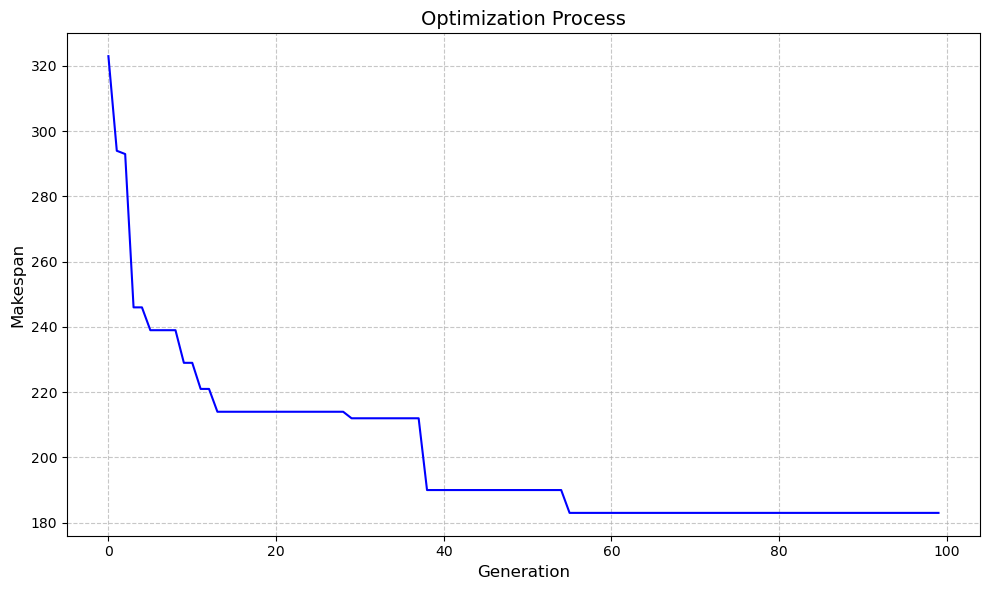

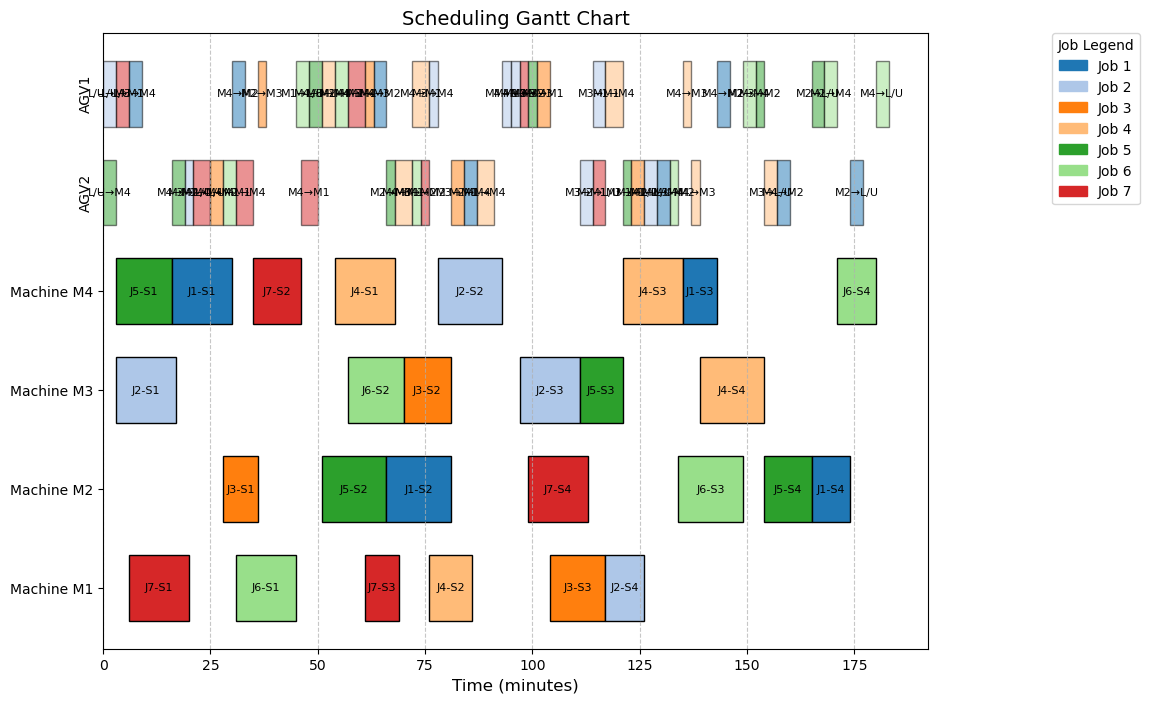

In [ ]:
class DynamicJSSPSolver:
    def __init__(self, transport_time, agv_count=2):
        """
        参数说明：
        transport_time: 固定运输时间字典，格式 {(from, to): time}
        agv_count: AGV数量
        """
        self.transport_time = self._symmetrize_transport(transport_time)
        self.agv_count = agv_count
        self.jobs = []
    
    def _symmetrize_transport(self, transport_dict):
        """对称化运输时间"""
        symmetric = transport_dict.copy()
        for (a, b), t in transport_dict.items():
            symmetric[(b, a)] = t
        return symmetric
    
    def update_production_data(self, time_matrix, machine_matrix):
        """动态更新生产数据"""
        self.jobs = self._preprocess_data(time_matrix, machine_matrix)
    
    def _preprocess_data(self, time_matrix, machine_matrix):
        """动态处理输入矩阵"""
        jobs = []
        for job_idx in range(len(time_matrix)):
            steps = []
            for step_idx in range(len(time_matrix[job_idx])):
                duration = time_matrix[job_idx][step_idx]
                machine = machine_matrix[job_idx][step_idx]
                
                if duration == -1 or machine == -1:
                    break
                
                steps.append({
                    'machine': machine - 1,  # 转为0-based
                    'duration': duration,
                    'transport': []
                })
            jobs.append(steps)
        
        # 添加运输任务
        for job in jobs:
            prev_loc = 'L/U'
            for i, step in enumerate(job):
                machine = f'M{step["machine"]+1}'
                
                # 前运输
                step['transport'].append({
                    'from': prev_loc,
                    'to': machine,
                    'time': self.transport_time.get((prev_loc, machine), 0)
                })
                
                # 后运输
                if i == len(job)-1:
                    step['transport'].append({
                        'from': machine,
                        'to': 'L/U',
                        'time': self.transport_time.get((machine, 'L/U'), 0)
                    })
                else:
                    next_machine = f'M{job[i+1]["machine"]+1}'
                    step['transport'].append({
                        'from': machine,
                        'to': next_machine,
                        'time': self.transport_time.get((machine, next_machine), 0)
                    })
                prev_loc = machine
        return jobs
    
    class ScheduleGene:
        def __init__(self, job_id, step_id, agv_assign):
            self.job_id = job_id
            self.step_id = step_id
            self.agv_assign = agv_assign  # [前运输AGV, 后运输AGV]
    
    class Chromosome:
        def __init__(self, genes, agv_count, jobs):
            self.genes = genes
            self.agv_count = agv_count  # 显式存储AGV数量
            self.jobs = jobs            # 存储作业数据引用
            self._makespan = None
            self._schedule = {'machines': defaultdict(list), 'agvs': defaultdict(list)}
        
        def decode(self):
            """动态解码方法"""
            self._schedule['machines'].clear()
            self._schedule['agvs'].clear()
            
            machine_times = defaultdict(float)
            agv_times = [0.0] * self.agv_count  # 使用正确参数
            job_progress = defaultdict(float)
            
            for gene in self.genes:
                job_id = gene.job_id
                step_id = gene.step_id
                step = self.jobs[job_id][step_id]
                
                # ===== 前运输 =====
                agv_pre = gene.agv_assign[0]
                pre_trans = step['transport'][0]
                start_pre = max(
                    job_progress.get((job_id, step_id-1), 0.0),
                    agv_times[agv_pre]
                )
                end_pre = start_pre + pre_trans['time']
                
                self._schedule['agvs'][agv_pre].append({
                    'start': start_pre,
                    'end': end_pre,
                    'from': pre_trans['from'],
                    'to': pre_trans['to'],
                    'job': job_id,
                    'step': step_id
                })
                agv_times[agv_pre] = end_pre
                
                # ===== 加工 =====
                machine = f'M{step["machine"]+1}'
                #process_start = end_pre
                process_start = max(end_pre, machine_times[machine]) # 新增机器约束
                process_end = process_start + step['duration']
                
                self._schedule['machines'][machine].append({
                    'start': process_start,
                    'end': process_end,
                    'job': job_id,
                    'step': step_id
                })
                machine_times[machine] = process_end
                
                # ===== 后运输 =====
                agv_post = gene.agv_assign[1]
                post_trans = step['transport'][1]
                start_post = max(process_end, agv_times[agv_post])
                end_post = start_post + post_trans['time']
                
                self._schedule['agvs'][agv_post].append({
                    'start': start_post,
                    'end': end_post,
                    'from': post_trans['from'],
                    'to': post_trans['to'],
                    'job': job_id,
                    'step': step_id
                })
                agv_times[agv_post] = end_post
                
                # 更新作业进度
                job_progress[(job_id, step_id)] = end_post
            
            # 计算总时间
            all_ends = chain(
                (t['end'] for m in self._schedule['machines'].values() for t in m),
                (t['end'] for a in self._schedule['agvs'].values() for t in a)
            )
            self._makespan = max(all_ends, default=0)
            return self._makespan
        
        @property
        def makespan(self):
            if self._makespan is None:
                self.decode()
            return self._makespan
    
    def solve(self, pop_size=50, max_gen=100, cx_prob=0.8, mut_prob=0.2):
        """动态调度求解入口"""
        # 参数设置
        self.pop_size = pop_size
        self.max_gen = max_gen
        self.cx_prob = cx_prob
        self.mut_prob = mut_prob
        self.elite_size = 2
        
        # 检查数据是否加载
        if not self.jobs:
            raise ValueError("请先使用update_production_data()加载生产数据")
        
        # 初始化种群
        population = self._initialize_population()
        best = min(population, key=lambda x: x.makespan)
        history = []
        
        for gen in range(self.max_gen):
            # 评估
            population.sort(key=lambda x: x.makespan)
            current_best = population[0].makespan
            history.append(current_best)
            
            # 更新最优
            if current_best < best.makespan:
                best = deepcopy(population[0])
            
            # 生成新一代
            elites = population[:self.elite_size]
            offspring = self._generate_offspring(population)
            population = elites + offspring[:self.pop_size - self.elite_size]
            
            print(f"Gen {gen+1}: Best={current_best}")
        
        return best, history
    
    def _initialize_population(self):
        """动态初始化种群"""
        total_steps = sum(len(job) for job in self.jobs)
        population = []
    
        if total_steps == 0:
            raise ValueError("总工序数为0，请检查输入数据")
    
        for _ in range(self.pop_size):
            genes = []
            job_progress = defaultdict(int)
            retry_count = 0
        
            while len(genes) < total_steps:
                # 安全机制
                if retry_count > 100:
                    print("警告：基因初始化困难，使用备用方案")
                    try:
                        genes = self._generate_random_genes(total_steps)
                    except RuntimeError as e:
                        print(f"致命错误: {str(e)}")
                        return []
                    break
            
                available = [j for j in range(len(self.jobs)) 
                            if job_progress[j] < len(self.jobs[j])]
            
                if not available:
                    retry_count += 1
                    continue  # 跳过当前循环
            
                job = random.choice(available)
                step = job_progress[job]
                agv_assign = [
                    random.randint(0, self.agv_count-1),
                    random.randint(0, self.agv_count-1)
                ]
                genes.append(self.ScheduleGene(job, step, agv_assign))
                job_progress[job] += 1
                retry_count = 0  # 重置计数器
        
            # 添加完整性检查
            if len(genes) != total_steps:
                print(f"基因数量异常: 应有{total_steps}，实有{len(genes)}")
                continue
        
            population.append(self.Chromosome(genes, self.agv_count, self.jobs))
        return population
    
    def _generate_offspring(self, population):
        """生成子代"""
        offspring = []
        while len(offspring) < self.pop_size - self.elite_size:
            p1, p2 = random.sample(population[:self.pop_size//2], 2)
            
            if random.random() < self.cx_prob:
                child = self._dynamic_crossover(p1, p2)
            else:
                child = deepcopy(random.choice([p1, p2]))
            
            child = self._dynamic_mutation(child)
            offspring.append(child)
        return offspring
    
    def _dynamic_crossover(self, parent1, parent2):
        """改进的动态顺序交叉"""
        child_genes = []
        job_progress = defaultdict(int)
        ptr1, ptr2 = 0, 0
        total_steps = sum(len(job) for job in self.jobs)
        max_attempts = total_steps * 5  # 最大尝试次数
        
        while len(child_genes) < total_steps and max_attempts > 0:
            max_attempts -= 1
            if random.random() < 0.5:
                # 从parent1选择
                while ptr1 < len(parent1.genes):
                    gene = parent1.genes[ptr1]
                    ptr1 += 1  # 先移动指针再检查
                    if job_progress[gene.job_id] == gene.step_id:
                        child_genes.append(gene)
                        job_progress[gene.job_id] += 1
                        break
            else:
                # 从parent2选择
                while ptr2 < len(parent2.genes):
                    gene = parent2.genes[ptr2]
                    ptr2 += 1  # 先移动指针再检查
                    if job_progress[gene.job_id] == gene.step_id:
                        child_genes.append(gene)
                        job_progress[gene.job_id] += 1
                        break
        
        # 基因补全机制
        try:
            if len(child_genes) < total_steps:
                print(f"交叉操作补全{total_steps - len(child_genes)}个基因")
                child_genes += self._generate_random_genes(total_steps - len(child_genes))
        except RuntimeError as e:
            print(f"交叉操作失败: {str(e)}")
            return random.choice([parent1, parent2])
    
        return self.Chromosome(child_genes, self.agv_count, self.jobs)
    
    def _generate_random_genes(self, num):
        """生成指定数量的随机基因"""
        genes = []
        job_progress = defaultdict(int)
        while len(genes) < num:
            available = [j for j in range(len(self.jobs)) 
                        if job_progress[j] < len(self.jobs[j])]
            if not available:
                raise RuntimeError("无法生成足够的基因，请检查生产数据是否正确")
            job = random.choice(available)
            step = job_progress[job]
            agv_assign = [
                random.randint(0, self.agv_count-1),
                random.randint(0, self.agv_count-1)
            ]
            genes.append(self.ScheduleGene(job, step, agv_assign))
            job_progress[job] += 1
        return genes
    
    def _dynamic_mutation(self, chrom):
        """安全变异策略"""
        new_genes = deepcopy(chrom.genes)
    
        # 工序交换变异（增强版）
        if random.random() < self.mut_prob:
            swap_candidates = []
            for i in range(len(new_genes)):
                current_job = new_genes[i].job_id
                # 放宽交换条件
                if i == 0 or new_genes[i-1].job_id != current_job:
                    swap_candidates.append(i)
        
            if len(swap_candidates) >= 2:
                idx1, idx2 = random.sample(swap_candidates, 2)
                new_genes[idx1], new_genes[idx2] = new_genes[idx2], new_genes[idx1]
    
        # AGV分配变异（增强多样性）
        for gene in new_genes:
            if random.random() < 0.2:  # 提高变异概率
                # 保持至少一个AGV不变
                if random.random() < 0.5:
                    gene.agv_assign[0] = random.randint(0, self.agv_count-1)
                else:
                    gene.agv_assign[1] = random.randint(0, self.agv_count-1)
    
        return self.Chromosome(new_genes, self.agv_count, self.jobs)
    
    
    def visualize(self, best_chrom, history):
        """可视化结果"""
        # ========== 优化过程折线图 ==========
        plt.figure(figsize=(10, 6))
        plt.plot(history, 'b-', linewidth=1.5)
        plt.title("Optimization Process", fontsize=14)
        plt.xlabel("Generation", fontsize=12)
        plt.ylabel("Makespan", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()  # 立即显示第一个图

        # ========== 甘特图 ==========
        plt.figure(figsize=(15, 8))
        best_chrom.decode()
        schedule = best_chrom._schedule
        colors = plt.cm.tab20.colors

        # 绘制机器调度
        y_ticks = []
        y_labels = []
        for idx, (machine, tasks) in enumerate(sorted(schedule['machines'].items())):
            y = idx * 3
            for task in tasks:
                plt.barh(y=y, 
                         width=task['end'] - task['start'],
                         left=task['start'],
                         height=2,
                         color=colors[task['job'] % 20],
                         edgecolor='black')
                plt.text((task['start'] + task['end']) / 2, y,
                         f"J{task['job']+1}-S{task['step']+1}",
                         ha='center', va='center', fontsize=8)
            y_ticks.append(y)
            y_labels.append(f'Machine {machine}')

        # 绘制AGV调度
        agv_base_y = len(schedule['machines']) * 3
        for idx, (agv, tasks) in enumerate(schedule['agvs'].items()):
            y = agv_base_y + idx * 3
            for task in tasks:
                plt.barh(y=y,
                         width=task['end'] - task['start'],
                         left=task['start'],
                         height=2,
                         color=colors[task['job'] % 20],
                         alpha=0.5,
                         edgecolor='black')
                plt.text((task['start'] + task['end']) / 2, y,
                         f"{task['from']}→{task['to']}",
                         ha='center', va='center', fontsize=8)
            y_ticks.append(y)
            y_labels.append(f'AGV{agv+1}')

        # 坐标轴设置
        plt.yticks(y_ticks, y_labels)
        plt.xlabel('Time (minutes)', fontsize=12)
        plt.title('Scheduling Gantt Chart', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

        # 图例
        patches = [mpatches.Patch(color=colors[i%20], label=f'Job {i+1}') 
                  for i in range(len(self.jobs))]
        plt.legend(handles=patches,
                   bbox_to_anchor=(1.15, 1),
                   loc='upper left',
                   borderaxespad=0.,
                   title="Job Legend")

        # 布局调整
        plt.subplots_adjust(left=0.25,  # 左侧空间（适应垂直标签）
                          right=0.8,   # 右侧空间（适应图例）
                          hspace=0.4)
        plt.show()

# 使用示例
if __name__ == "__main__":
    
    # 初始化求解器
    solver = DynamicJSSPSolver(
        transport_time=TRANSPORT_TIME,
        agv_count=2
    )
    
    #time_matrix = time_matrix
    #machine_matrix = machine_matrix
    
    # 更新生产数据并求解
    solver.update_production_data(time_matrix, machine_matrix)
    best_solution, history = solver.solve(pop_size=50, max_gen=100)
    print(f"最优完成时间: {best_solution.makespan} 分钟")
    solver.visualize(best_solution, history)